In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import ds_functions as ds
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.feature_selection import chi2
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import nbimporter
import FeatureSelection as fs
import Scaling as sl
import DataBalancing as db
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
import scipy.stats as stats

data1 = pd.read_csv('Datasets/heart_failure_clinical_records_dataset.csv', sep=',', decimal='.')
data2 = pd.read_csv('Datasets/qsar_oral_toxicity.csv', sep=';', decimal='.')

## Heart Failure Dataset

Feature: 0, Score: 0.04297
Feature: 1, Score: 0.03343
Feature: 2, Score: 0.07648
Feature: 3, Score: 0.00767
Feature: 4, Score: 0.07971
Feature: 5, Score: 0.01938
Feature: 6, Score: 0.09522
Feature: 7, Score: 0.09851
Feature: 8, Score: 0.05160
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00358
Feature: 11, Score: 0.49145


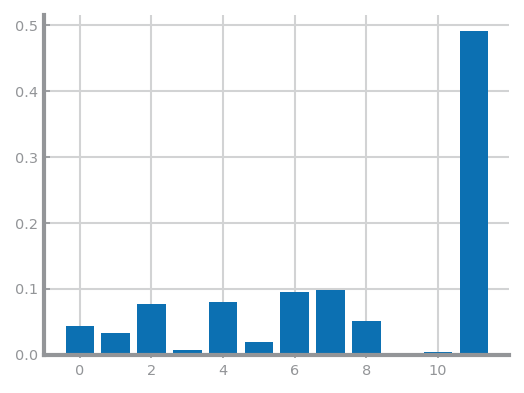

In [43]:
df = data1.copy()

y: np.ndarray = df.pop(df.columns[-1]).values
X: np.ndarray = df.values
    
# define the model
model = DecisionTreeRegressor(random_state=89)
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

results = []

### No data preparation

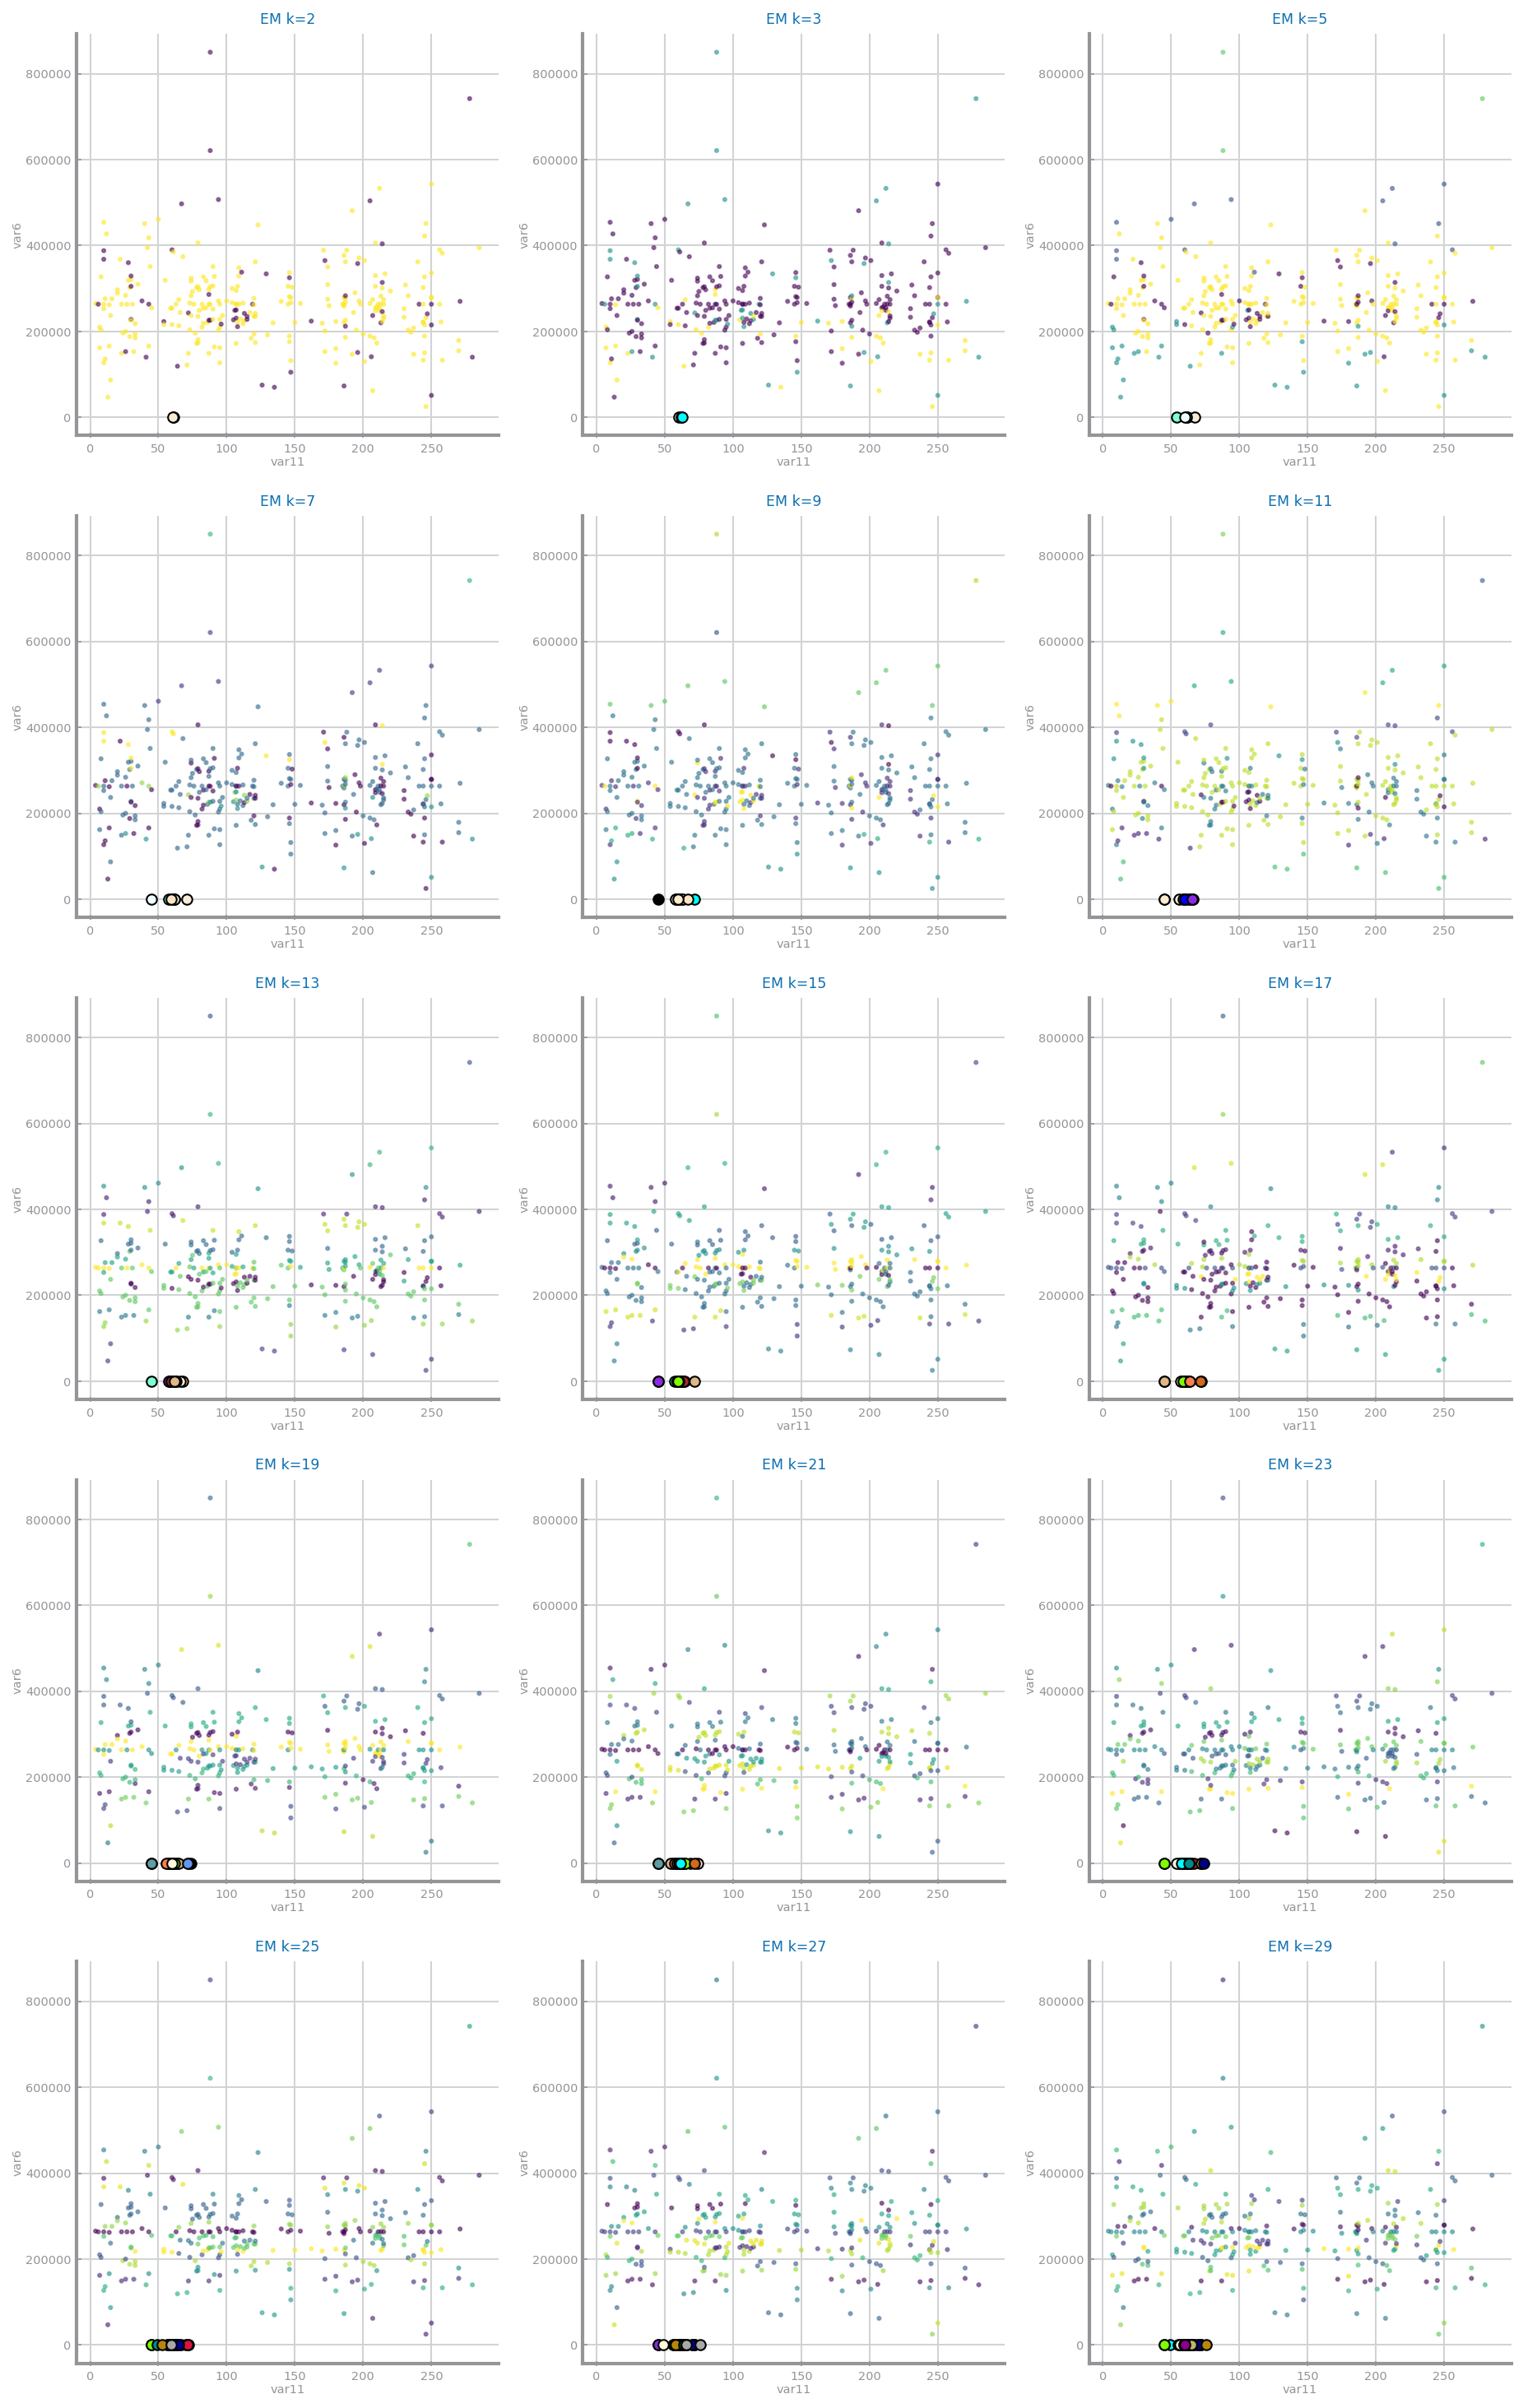

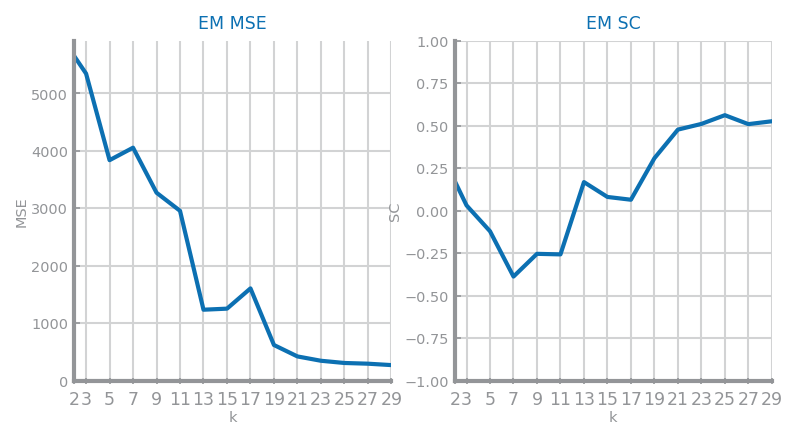

3835.461610897741


In [51]:
from sklearn.mixture import GaussianMixture

v1 = 6
v2 = 11

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
rows, cols = ds.choose_grid(len(N_CLUSTERS))

df = data1.copy()
df.pop('DEATH_EVENT')

mse: list = []
sc: list = []
_, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    estimator = GaussianMixture(n_components=k)
    estimator.fit(df)
    labels = estimator.predict(df)
    mse.append(ds.compute_mse(df.values, labels, estimator.means_))
    sc.append(silhouette_score(df, labels))
    ds.plot_clusters(df, v2, v1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(6, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, mse, title='EM MSE', xlabel='k', ylabel='MSE', ax=ax[0, 0])
ds.plot_line(N_CLUSTERS, sc, title='EM SC', xlabel='k', ylabel='SC', ax=ax[0, 1], percentage=True)
ax[0, 1].set_ylim((-1, 1))
plt.show()

print(mse[2])
results.append(['No data preparation: ', mse[5]])

In [56]:
print('hi', results)

hi [['No data preparation: ', 2207.0746724154396], ['Only balancing: ', 3452.410530440389], ['Only balancing: ', 2090.305132953113], ['No data preparation: ', 2190.211976524866], ['No data preparation: ', 2953.2099857071203], ['Only balancing: ', 1766.6741501474626]]


### Balanced

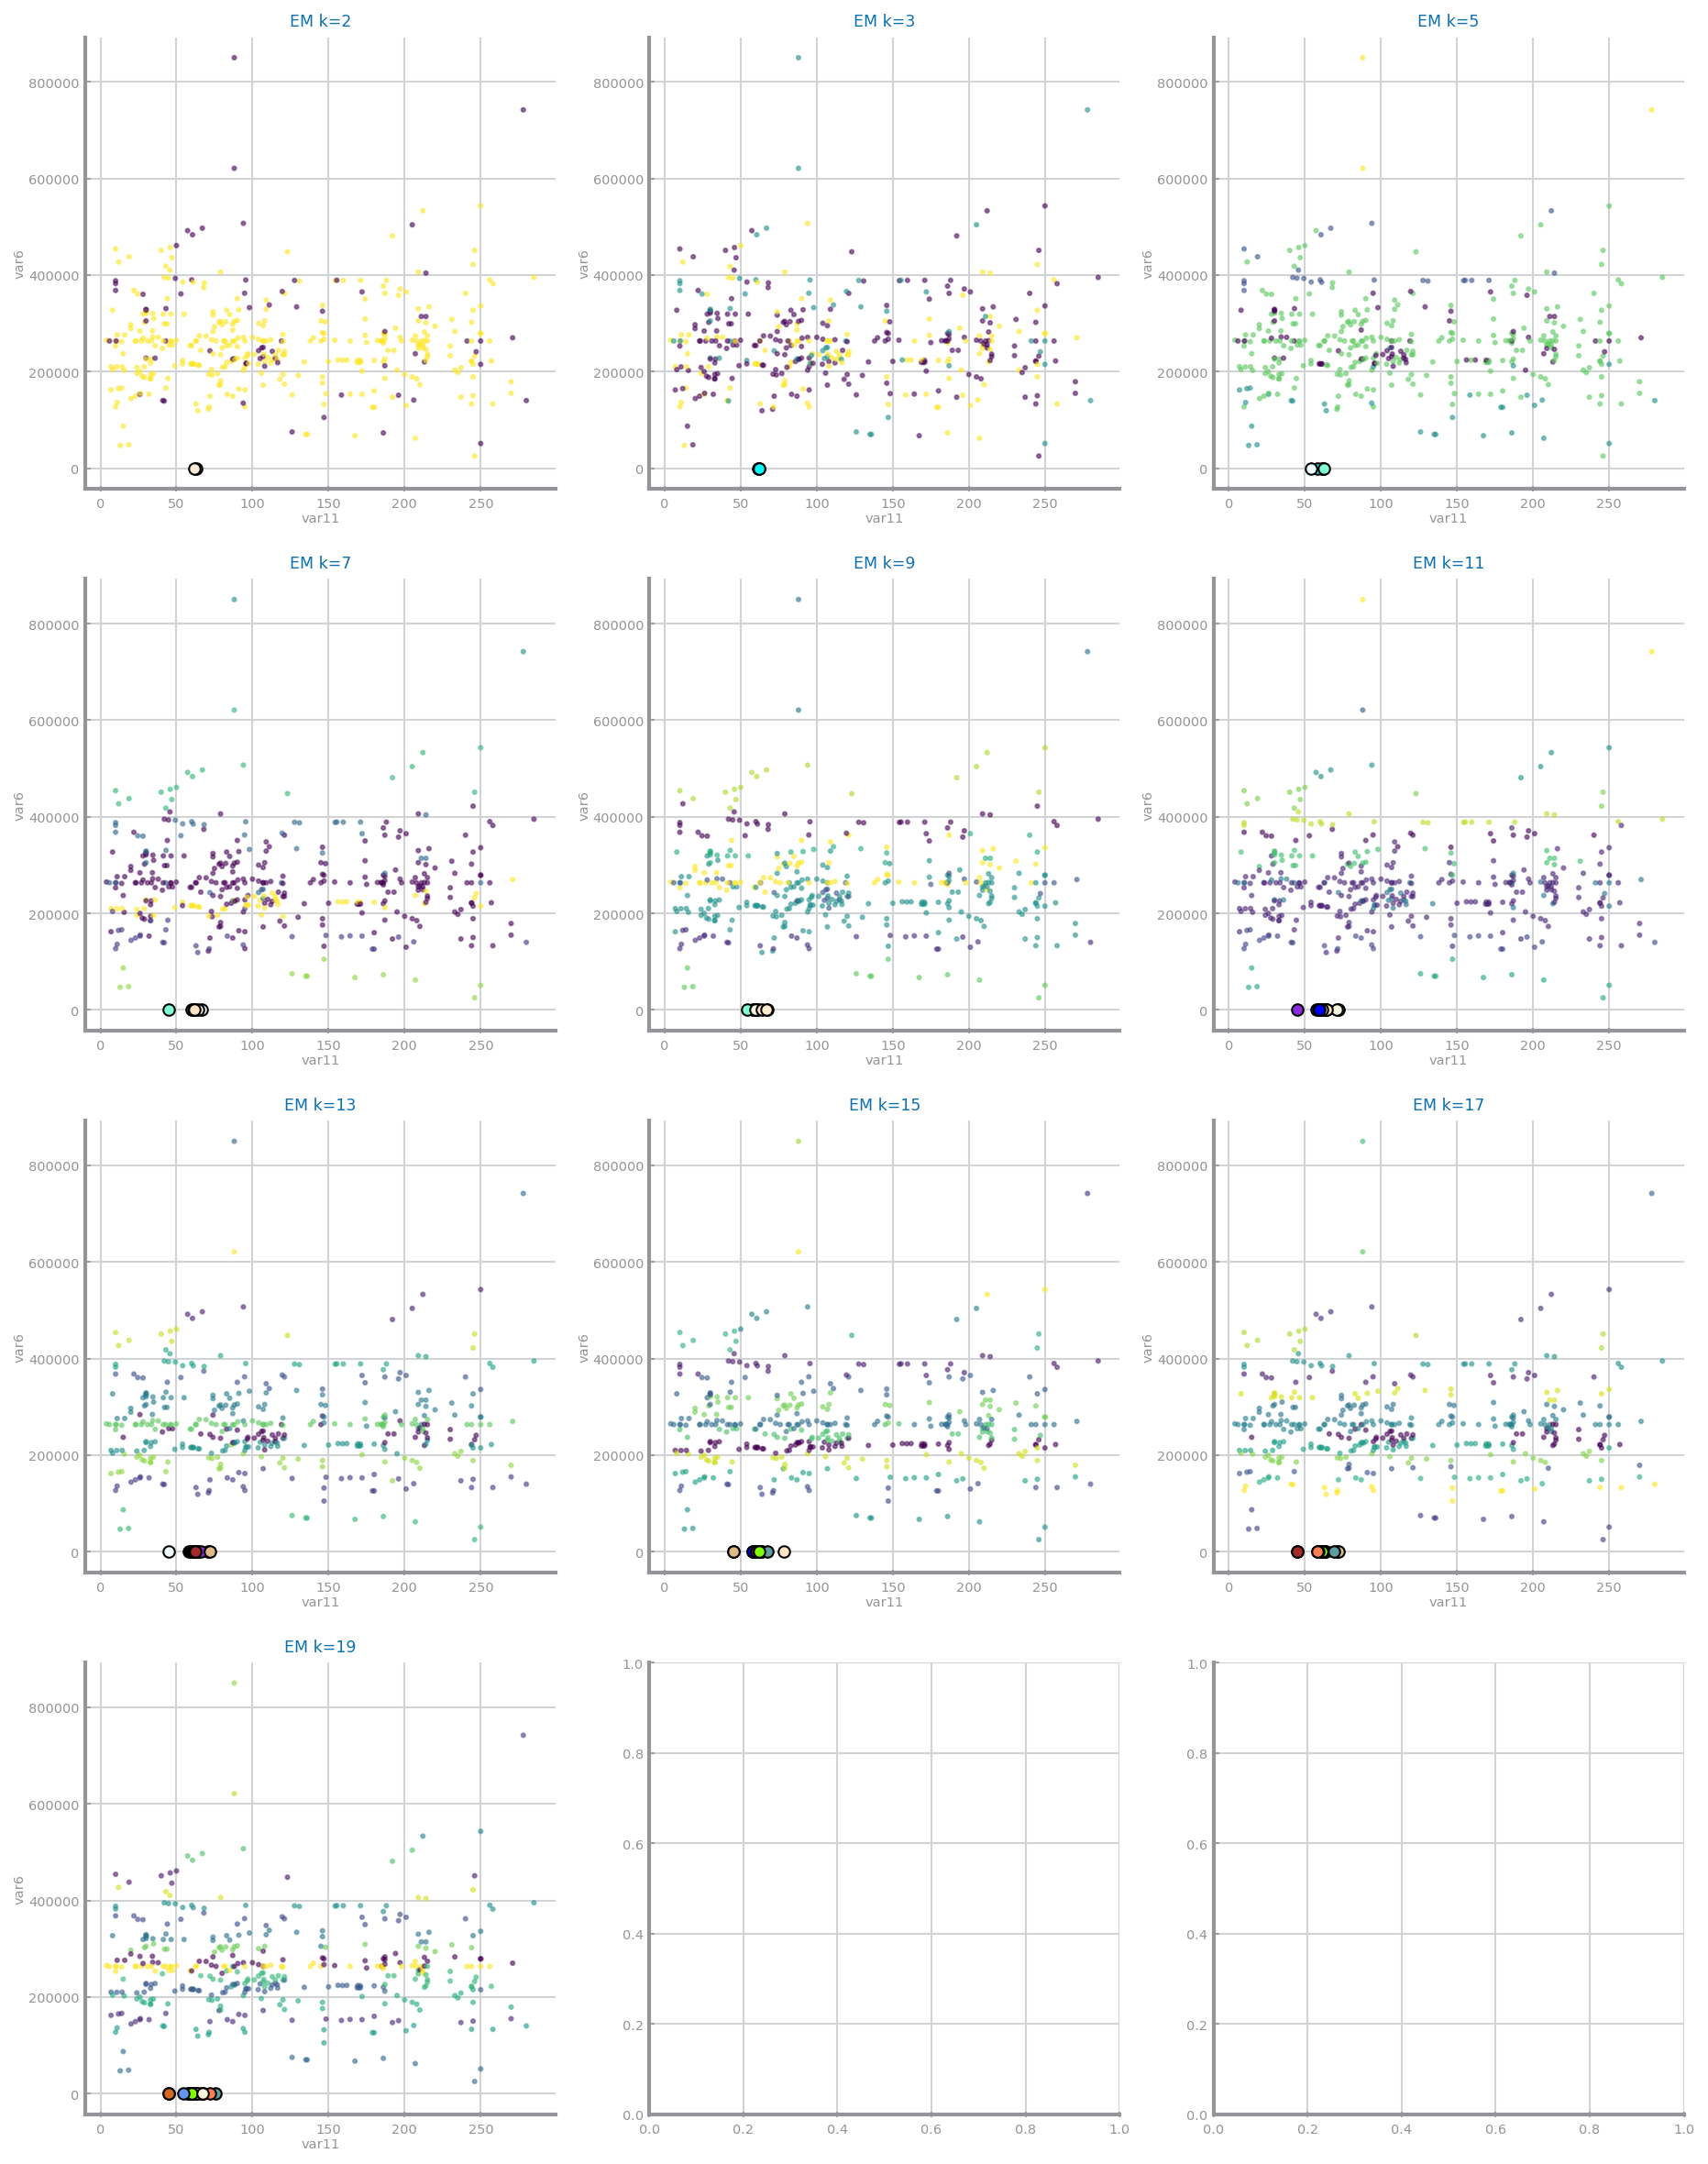

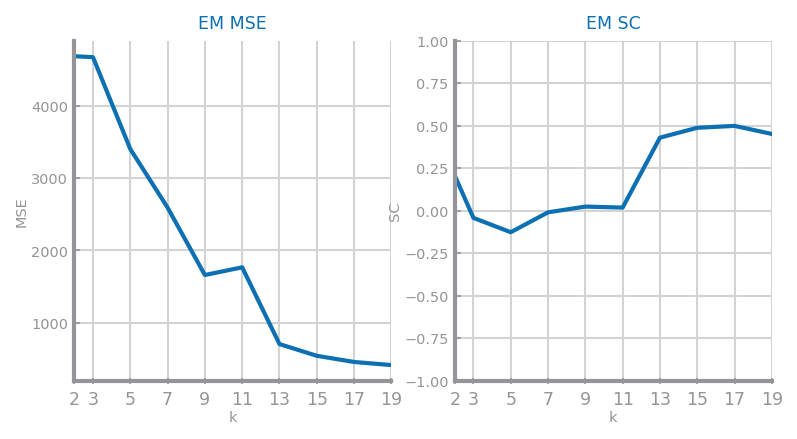

1766.6741501474626


In [52]:
v1 = 6
v2 = 11

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19] #, 21, 23, 25, 27, 29]
rows, cols = ds.choose_grid(len(N_CLUSTERS))

df = data1.copy()
y: np.ndarray = df.pop('DEATH_EVENT').values
X: np.ndarray = df.values
    
X, _ = db.balance_SMOTE(X, y)
df = pd.DataFrame(X)


mse: list = []
sc: list = []
_, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    estimator = GaussianMixture(n_components=k)
    estimator.fit(df)
    labels = estimator.predict(df)
    mse.append(ds.compute_mse(df.values, labels, estimator.means_))
    sc.append(silhouette_score(df, labels))
    ds.plot_clusters(df, v2, v1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(6, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, mse, title='EM MSE', xlabel='k', ylabel='MSE', ax=ax[0, 0])
ds.plot_line(N_CLUSTERS, sc, title='EM SC', xlabel='k', ylabel='SC', ax=ax[0, 1], percentage=True)
ax[0, 1].set_ylim((-1, 1))
plt.show()

print(mse[5])
results.append(['Only balancing: ', mse[5]])

### z-score scaling

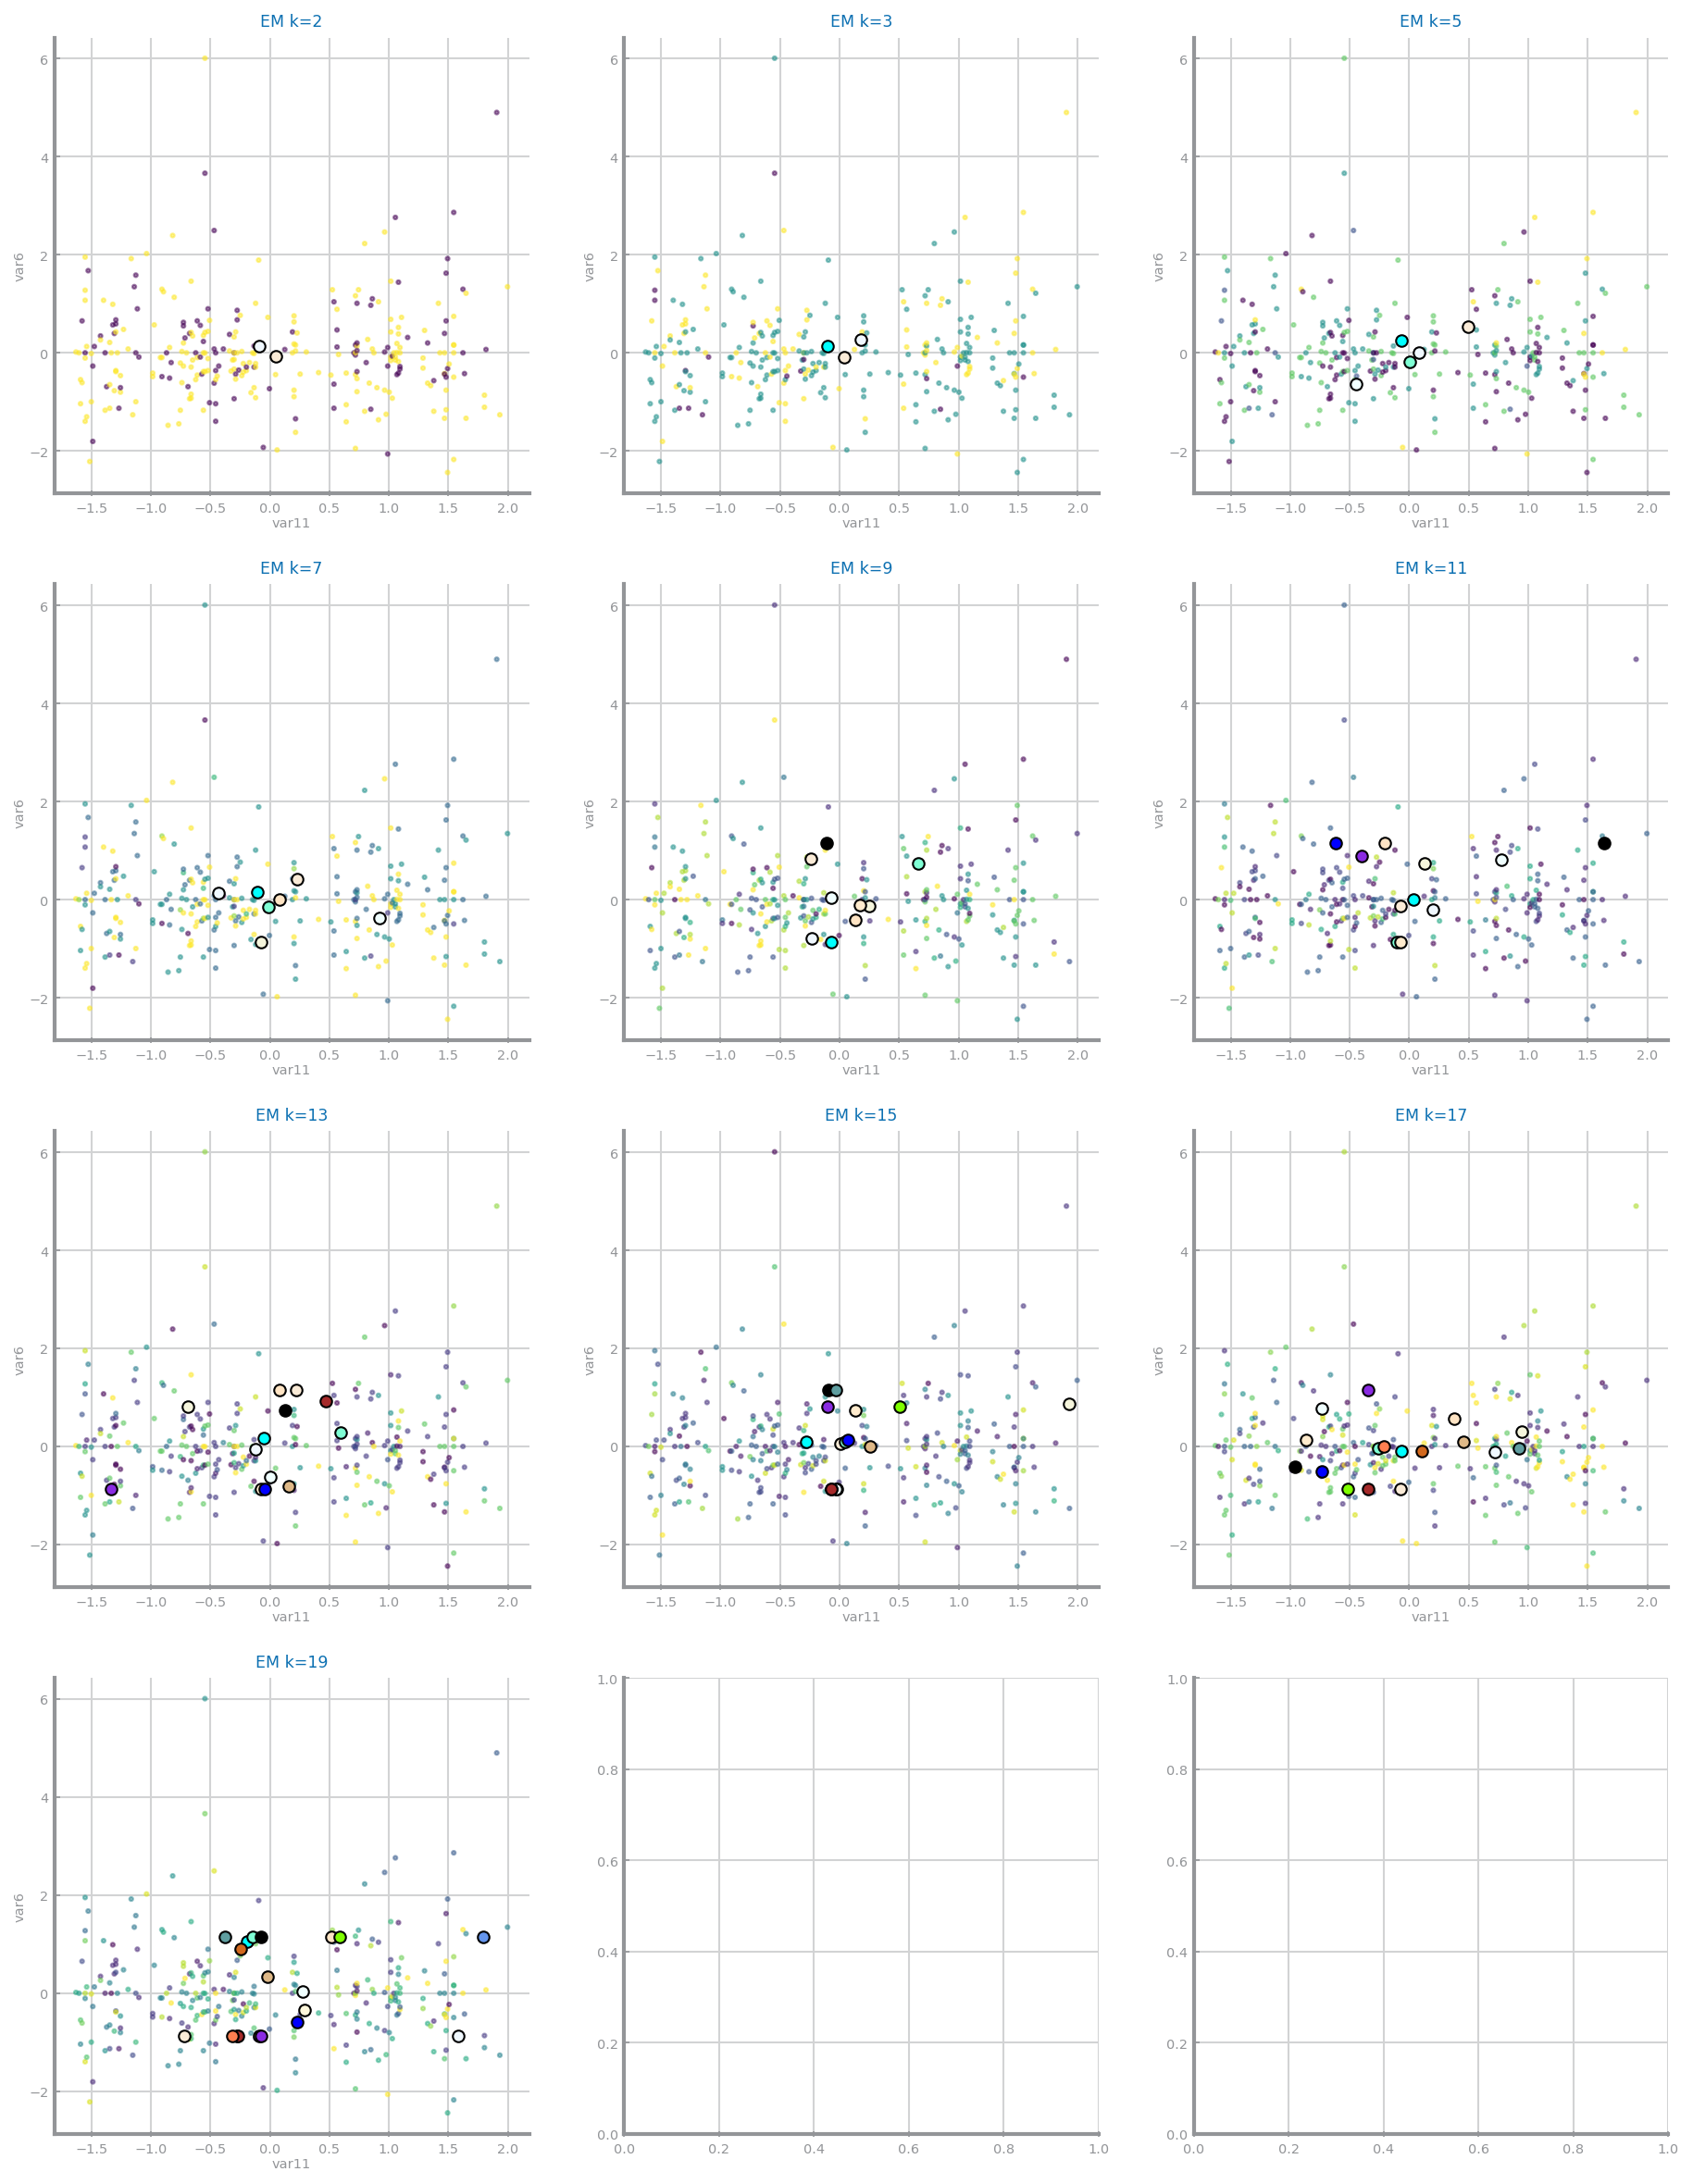

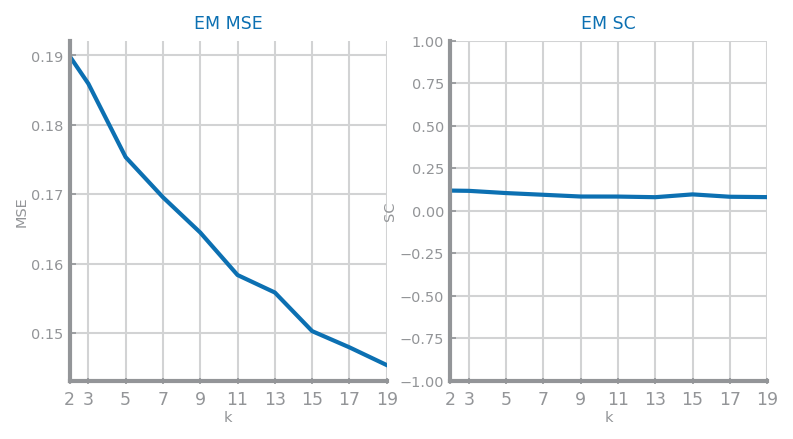

In [53]:
v1 = 6
v2 = 11

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19] #, 21, 23, 25, 27, 29]
rows, cols = ds.choose_grid(len(N_CLUSTERS))

df = data1.copy()
df.pop('DEATH_EVENT')
df = sl.normalize_zscore(df)
    


mse: list = []
sc: list = []
_, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    estimator = GaussianMixture(n_components=k)
    estimator.fit(df)
    labels = estimator.predict(df)
    mse.append(ds.compute_mse(df.values, labels, estimator.means_))
    sc.append(silhouette_score(df, labels))
    ds.plot_clusters(df, v2, v1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(6, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, mse, title='EM MSE', xlabel='k', ylabel='MSE', ax=ax[0, 0])
ds.plot_line(N_CLUSTERS, sc, title='EM SC', xlabel='k', ylabel='SC', ax=ax[0, 1], percentage=True)
ax[0, 1].set_ylim((-1, 1))
plt.show()

### Select 4-best

[ 0  4  7 11] (299, 13)
(299, 4)


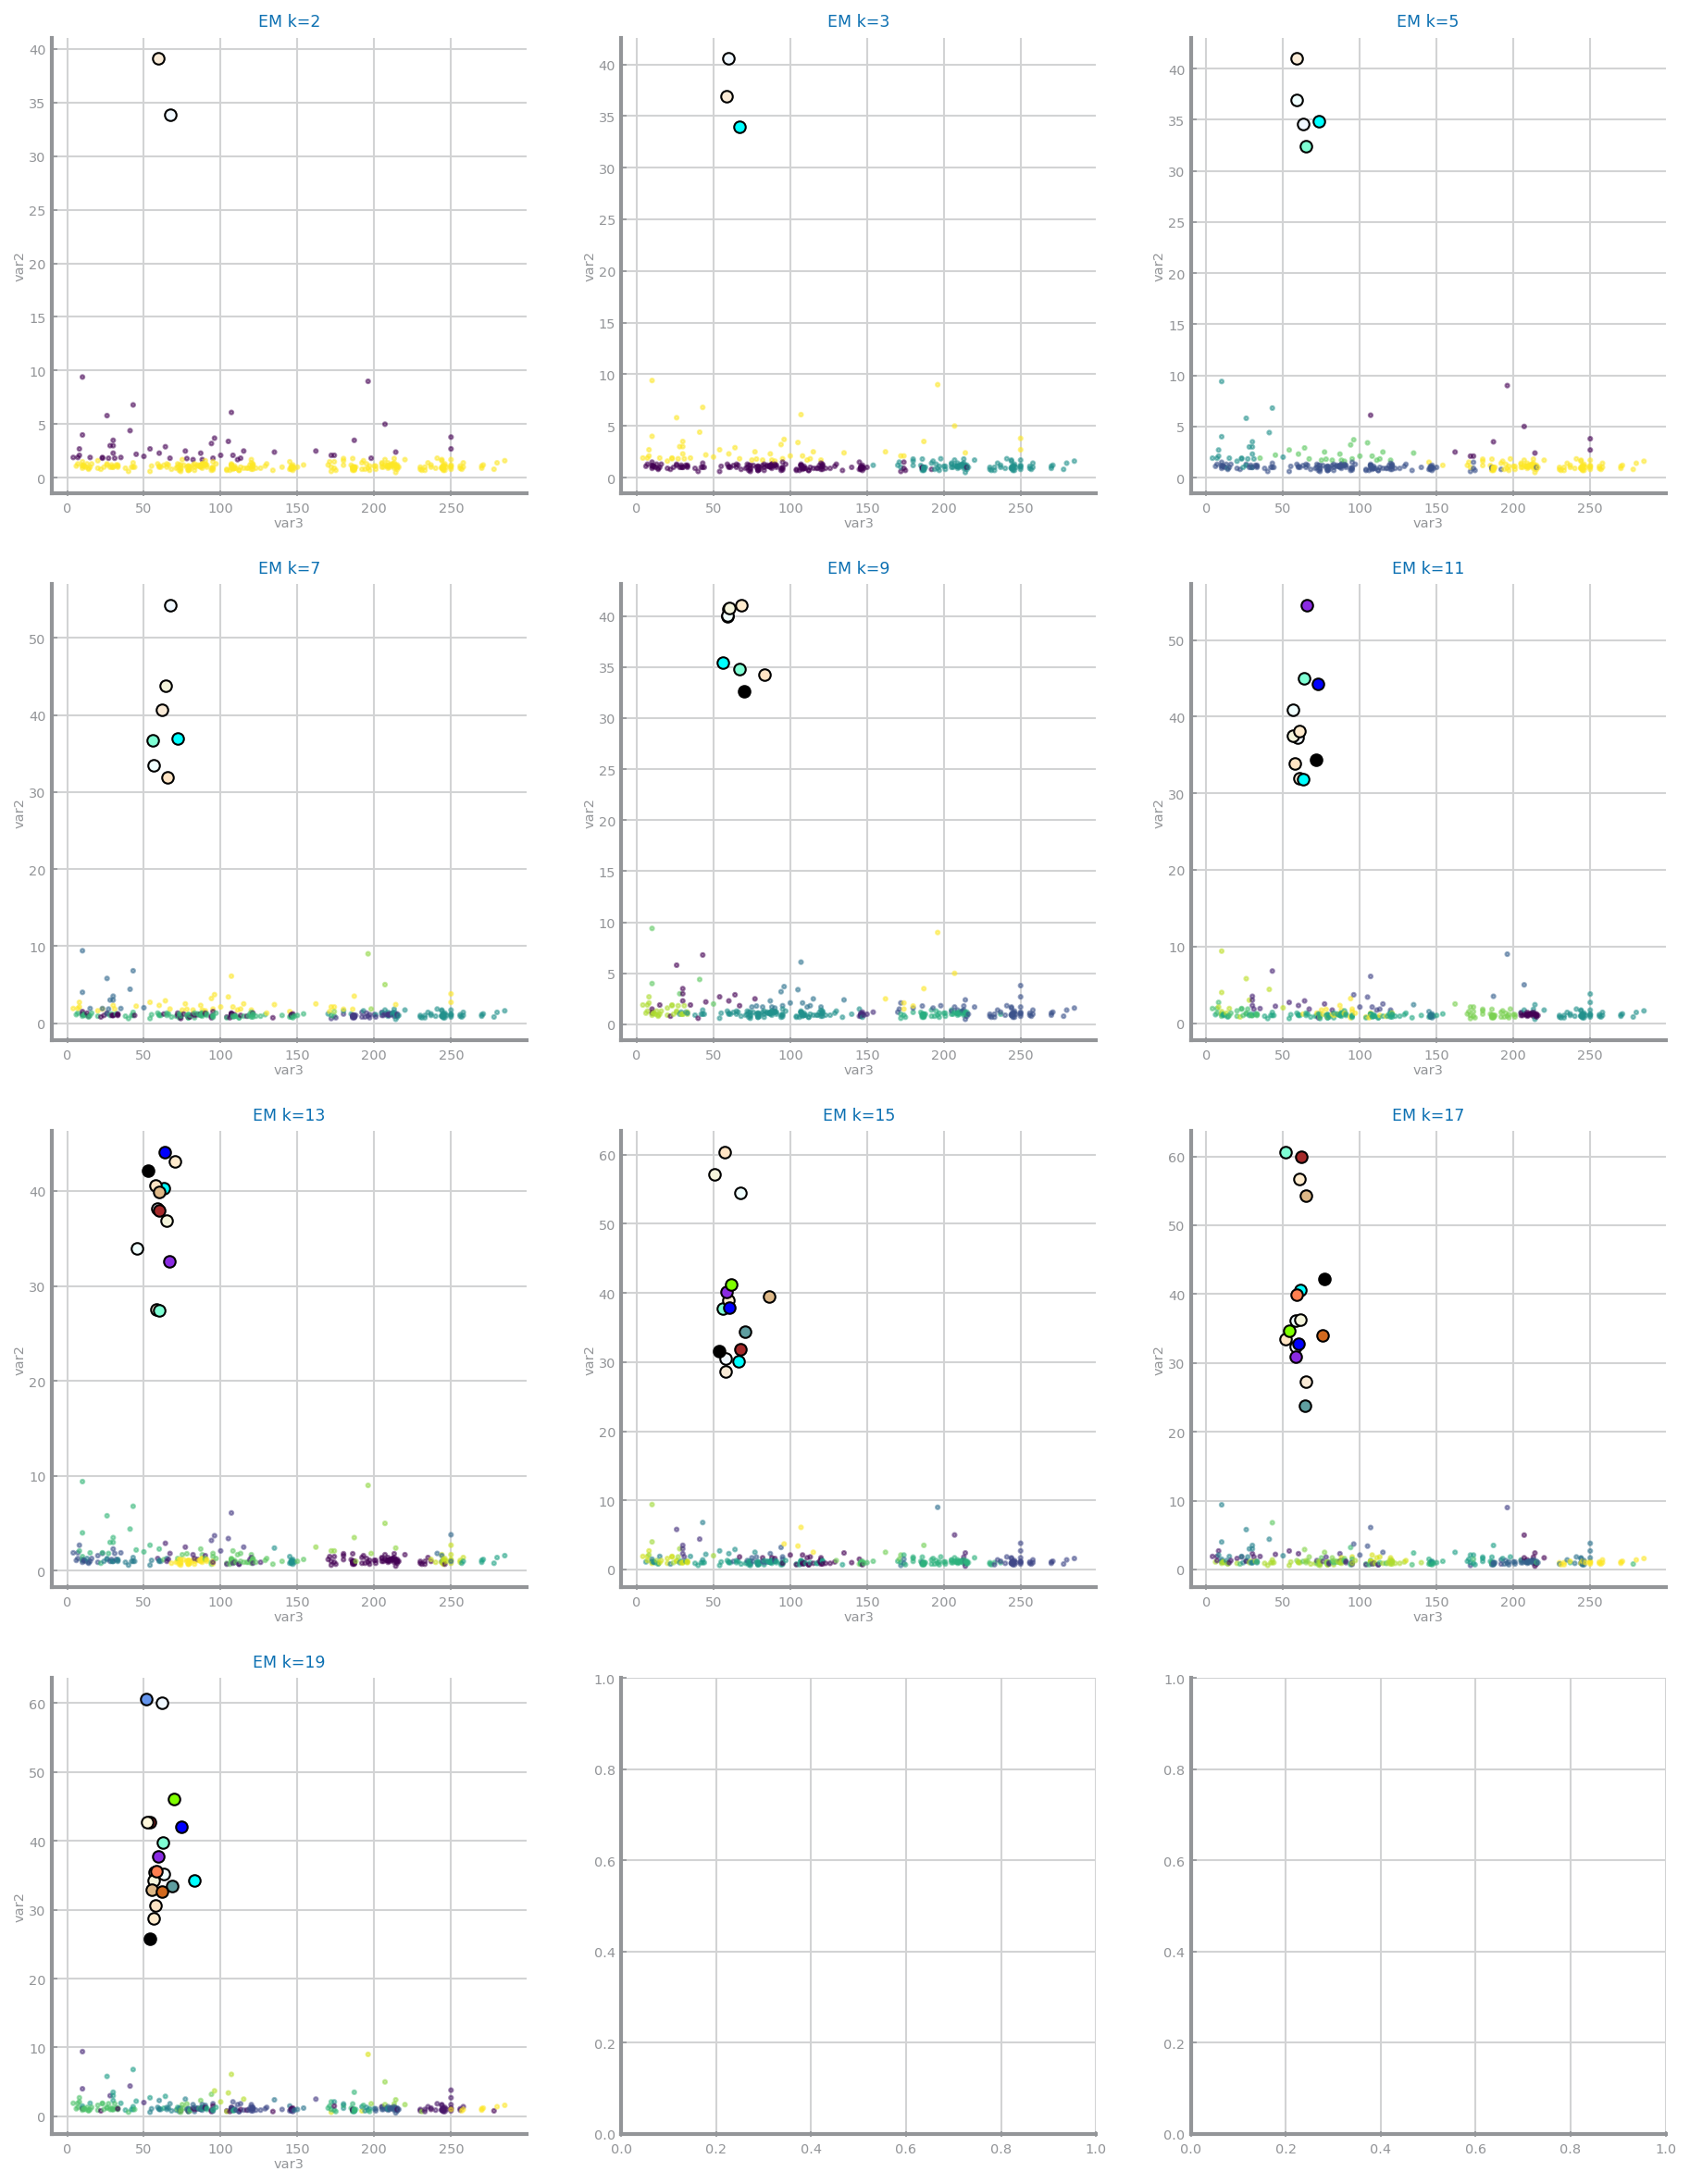

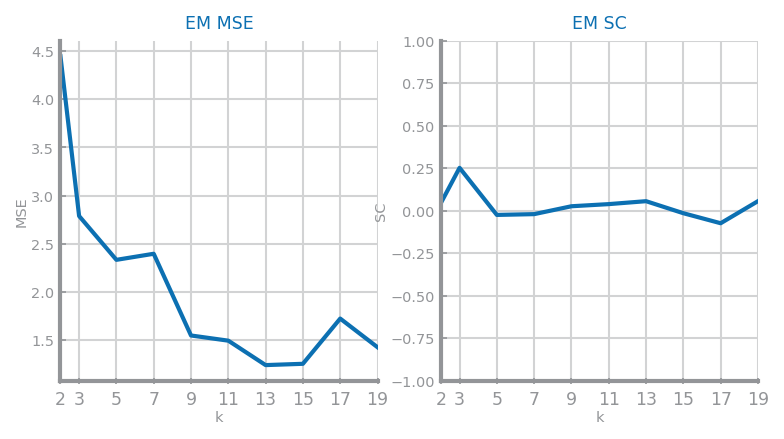

In [54]:
v1 = 2
v2 = 3

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19] #, 21, 23, 25, 27, 29]
rows, cols = ds.choose_grid(len(N_CLUSTERS))

df = data1.copy()
#df.pop('DEATH_EVENT')

_, _, feature_indexes = fs.select_k_best(df, 4)
print(feature_indexes, df.shape)
df = df.iloc[:,feature_indexes]
print(df.shape)
    


mse: list = []
sc: list = []
_, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    estimator = GaussianMixture(n_components=k)
    estimator.fit(df)
    labels = estimator.predict(df)
    mse.append(ds.compute_mse(df.values, labels, estimator.means_))
    sc.append(silhouette_score(df, labels))
    ds.plot_clusters(df, v2, v1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(6, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, mse, title='EM MSE', xlabel='k', ylabel='MSE', ax=ax[0, 0])
ds.plot_line(N_CLUSTERS, sc, title='EM SC', xlabel='k', ylabel='SC', ax=ax[0, 1], percentage=True)
ax[0, 1].set_ylim((-1, 1))
plt.show()

### Z-score + 4-best

[ 0  4  7 11] (299, 13)
(299, 4)


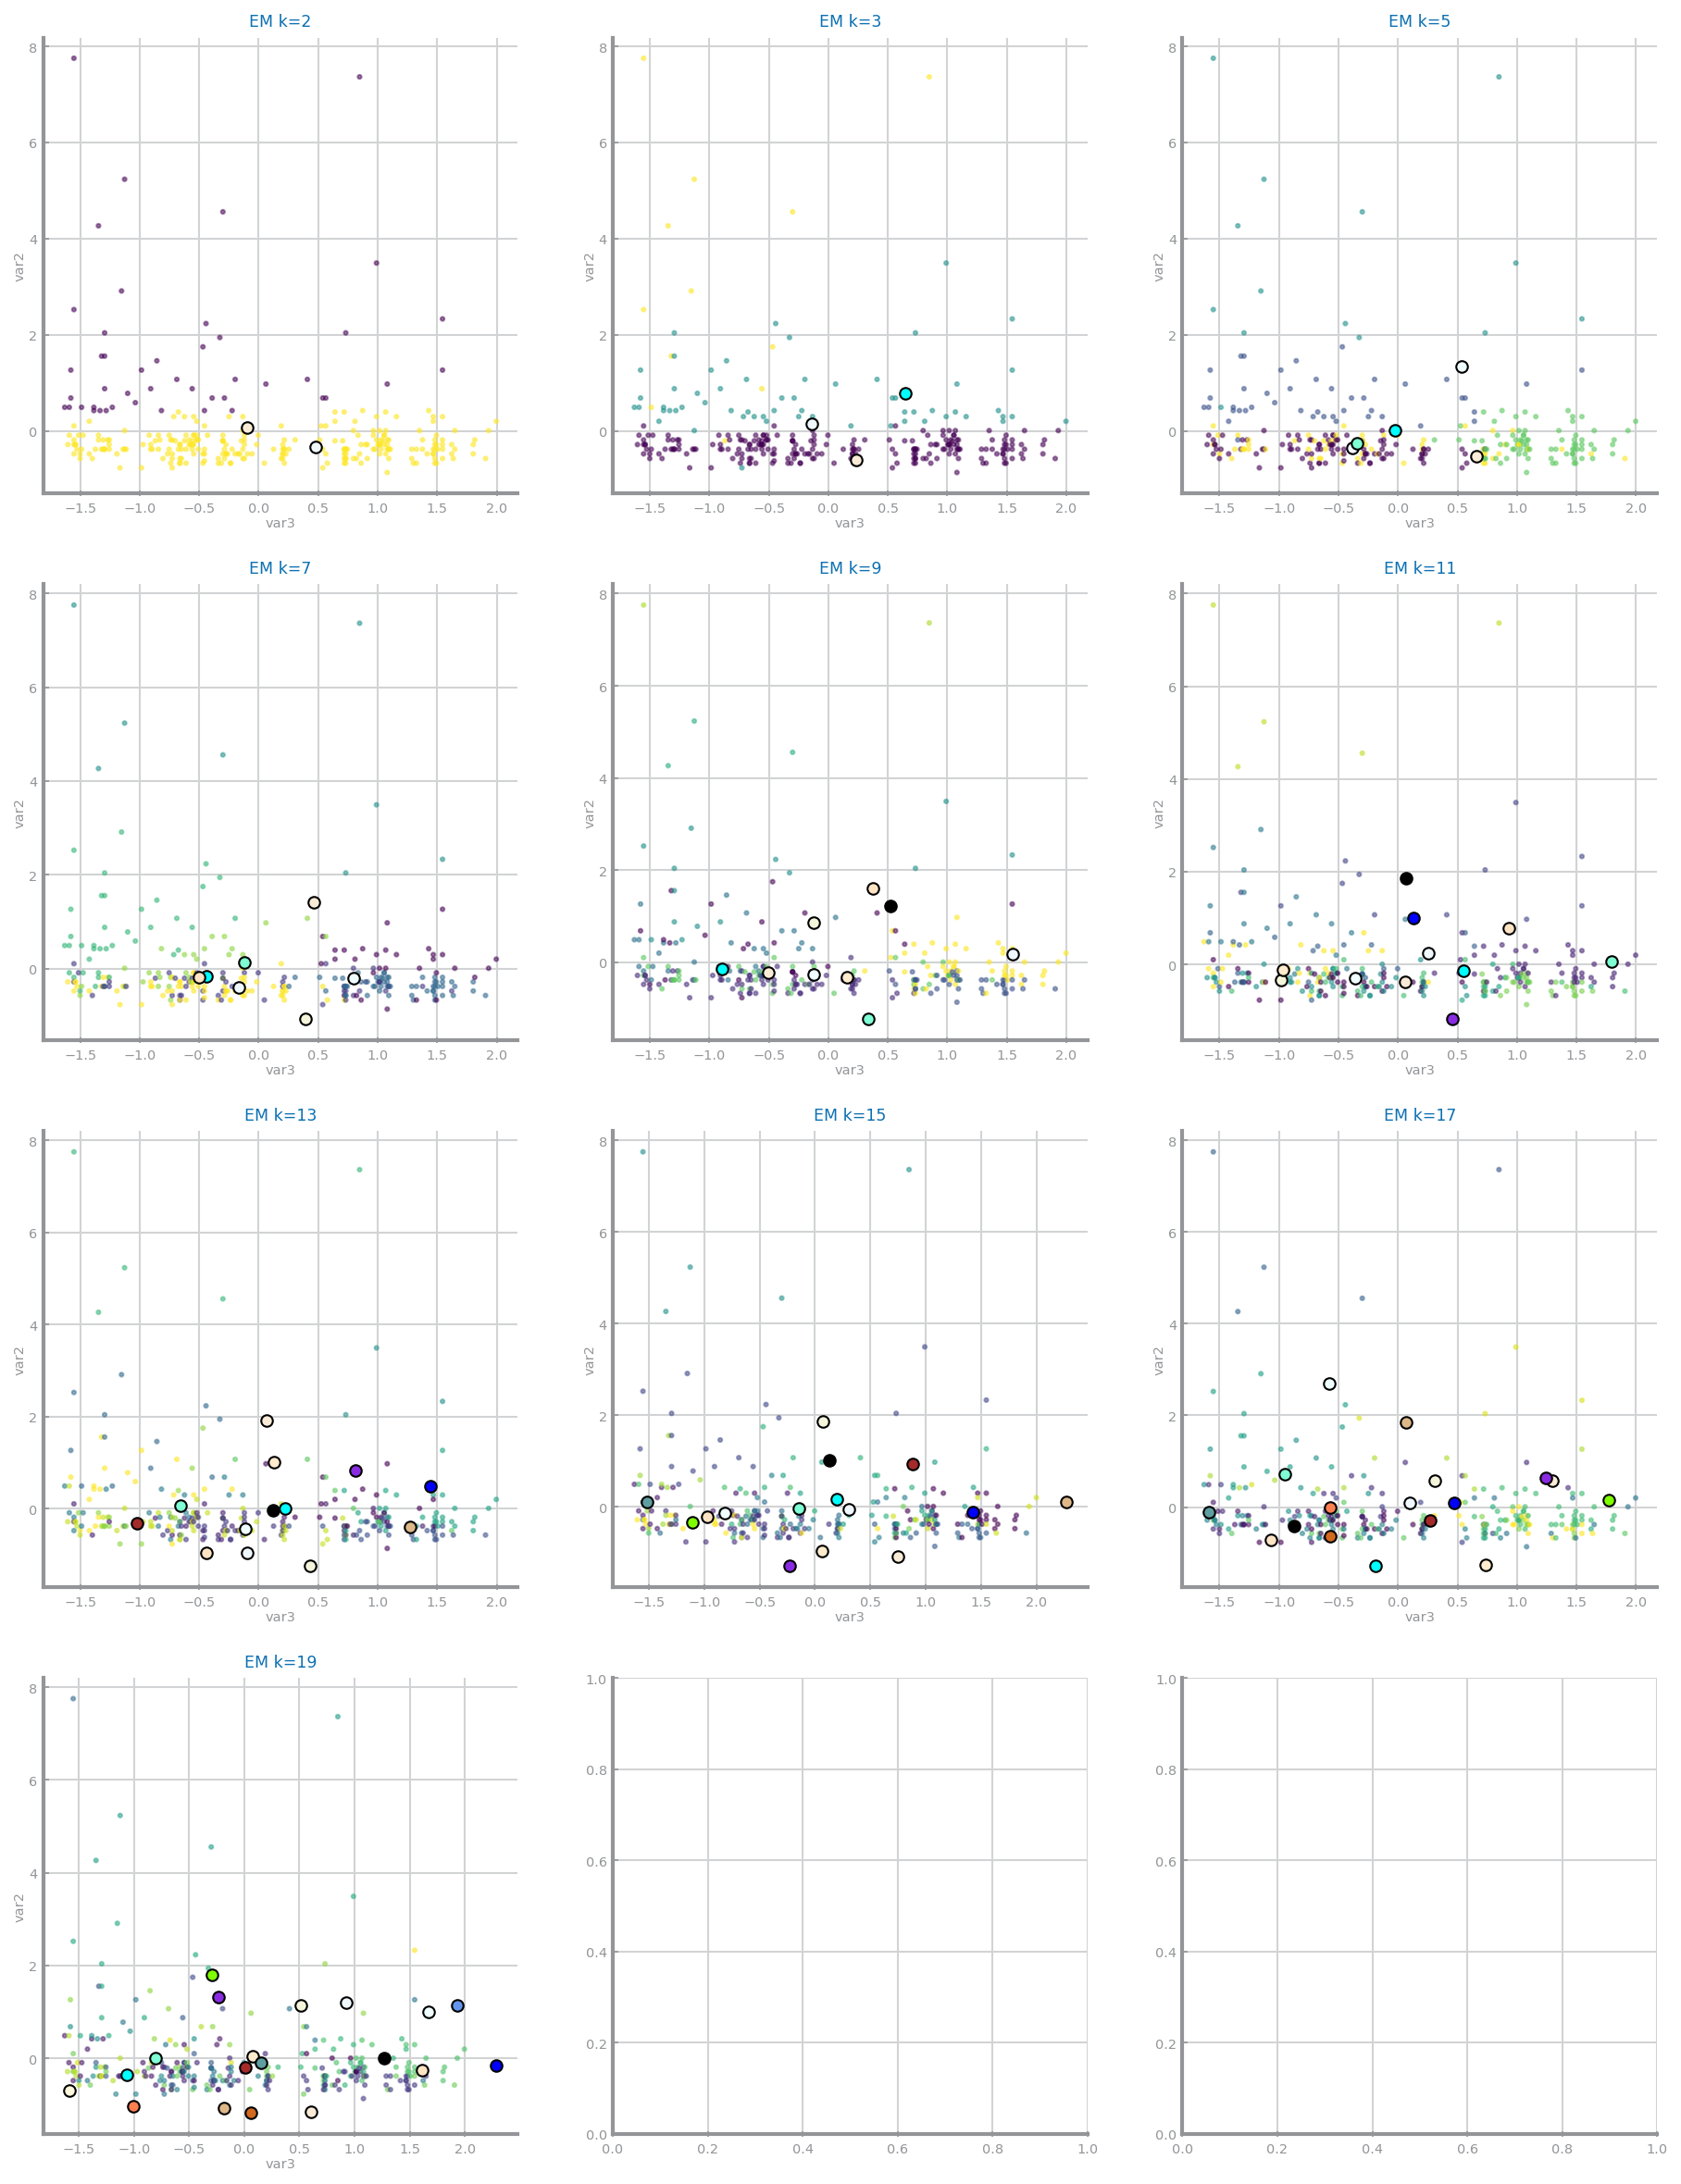

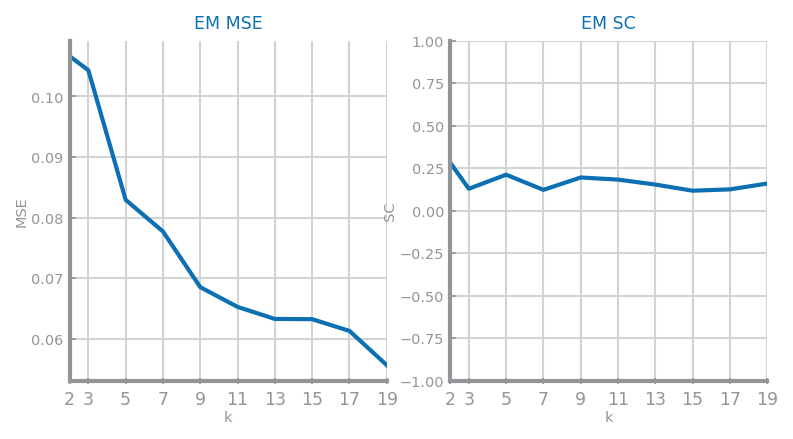

In [55]:
v1 = 2
v2 = 3

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19] #, 21, 23, 25, 27, 29]
rows, cols = ds.choose_grid(len(N_CLUSTERS))

df = data1.copy()
df = sl.normalize_zscore(df)
#df.pop('DEATH_EVENT')

_, _, feature_indexes = fs.select_k_best(df, 4)
print(feature_indexes, df.shape)
df = df.iloc[:,feature_indexes]
print(df.shape)
    


mse: list = []
sc: list = []
_, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    estimator = GaussianMixture(n_components=k)
    estimator.fit(df)
    labels = estimator.predict(df)
    mse.append(ds.compute_mse(df.values, labels, estimator.means_))
    sc.append(silhouette_score(df, labels))
    ds.plot_clusters(df, v2, v1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(6, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, mse, title='EM MSE', xlabel='k', ylabel='MSE', ax=ax[0, 0])
ds.plot_line(N_CLUSTERS, sc, title='EM SC', xlabel='k', ylabel='SC', ax=ax[0, 1], percentage=True)
ax[0, 1].set_ylim((-1, 1))
plt.show()

In [29]:
print('MSE Results\n')
for r in results:
    print(r[0] + str("{:e}".format(r[1])))

MSE Results



## Oral toxicity dataset

In [30]:
df = data2.copy()

# Cast target variable to binary
df[df.columns[-1]] = (df[df.columns[-1]] == 'positive').astype(int)

y: np.ndarray = df.pop(df.columns[-1]).values
X: np.ndarray = df.values
    
# define the model
model = DecisionTreeRegressor(random_state=89)
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
most_important = []
for i,v in enumerate(importance):
    if v >= 0.01:
        print('Feature: %0d, Score: %.5f' % (i,v))
        most_important.append([i, v])
        
results2 = []

Feature: 37, Score: 0.04336
Feature: 282, Score: 0.06581
Feature: 379, Score: 0.01081
Feature: 427, Score: 0.02023
Feature: 449, Score: 0.03983
Feature: 482, Score: 0.01225
Feature: 844, Score: 0.01317
Feature: 939, Score: 0.01042


### No data preparation

KeyboardInterrupt: 

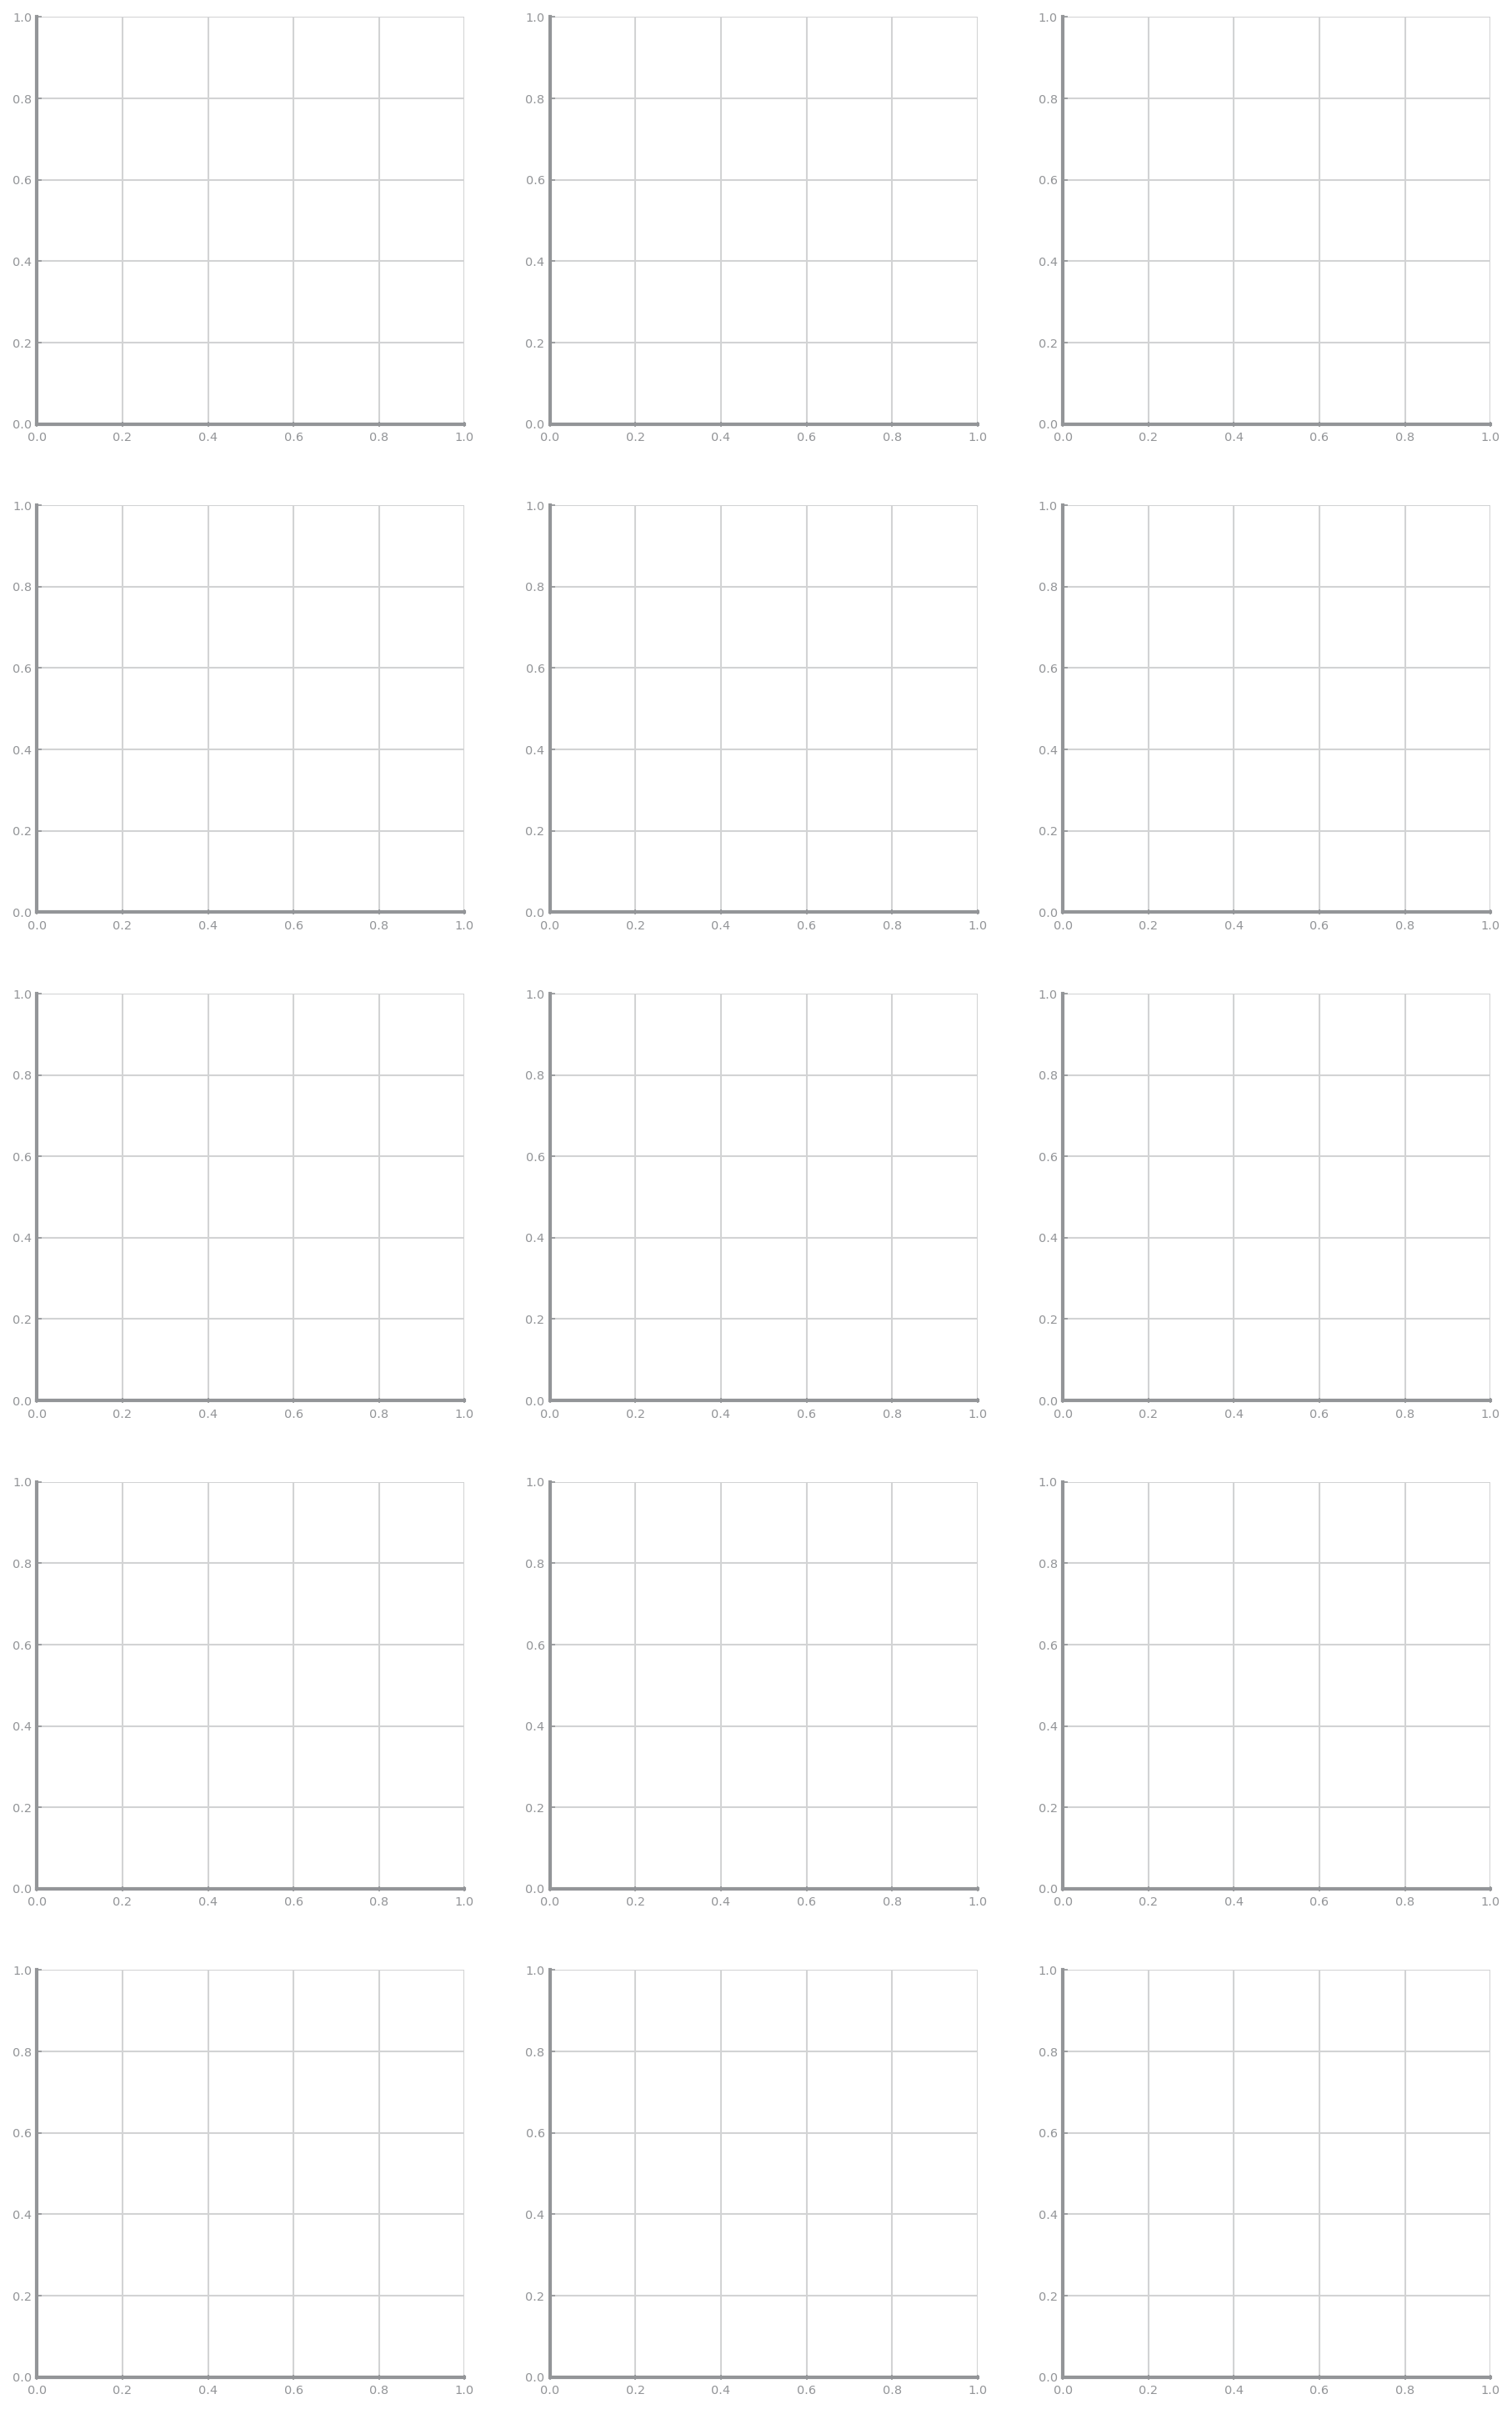

In [35]:
df = data2.copy()

# Cast target variable to binary
df[df.columns[-1]] = (df[df.columns[-1]] == 'positive').astype(int)

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
rows, cols = ds.choose_grid(len(N_CLUSTERS))

v1 = 2
v2 = 3

mse: list = []
sc: list = []
_, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    estimator = GaussianMixture(n_components=k)
    estimator.fit(df)
    labels = estimator.predict(df)
    mse.append(ds.compute_mse(df.values, labels, estimator.means_))
    sc.append(silhouette_score(df, labels))
    #ds.plot_clusters(df, v2, v1, labels.astype(float), estimator.means_, k,
                     #f'EM k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(6, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, mse, title='EM MSE', xlabel='k', ylabel='MSE', ax=ax[0, 0])
ds.plot_line(N_CLUSTERS, sc, title='EM SC', xlabel='k', ylabel='SC', ax=ax[0, 1], percentage=True)
plt.show()

### Feature selection

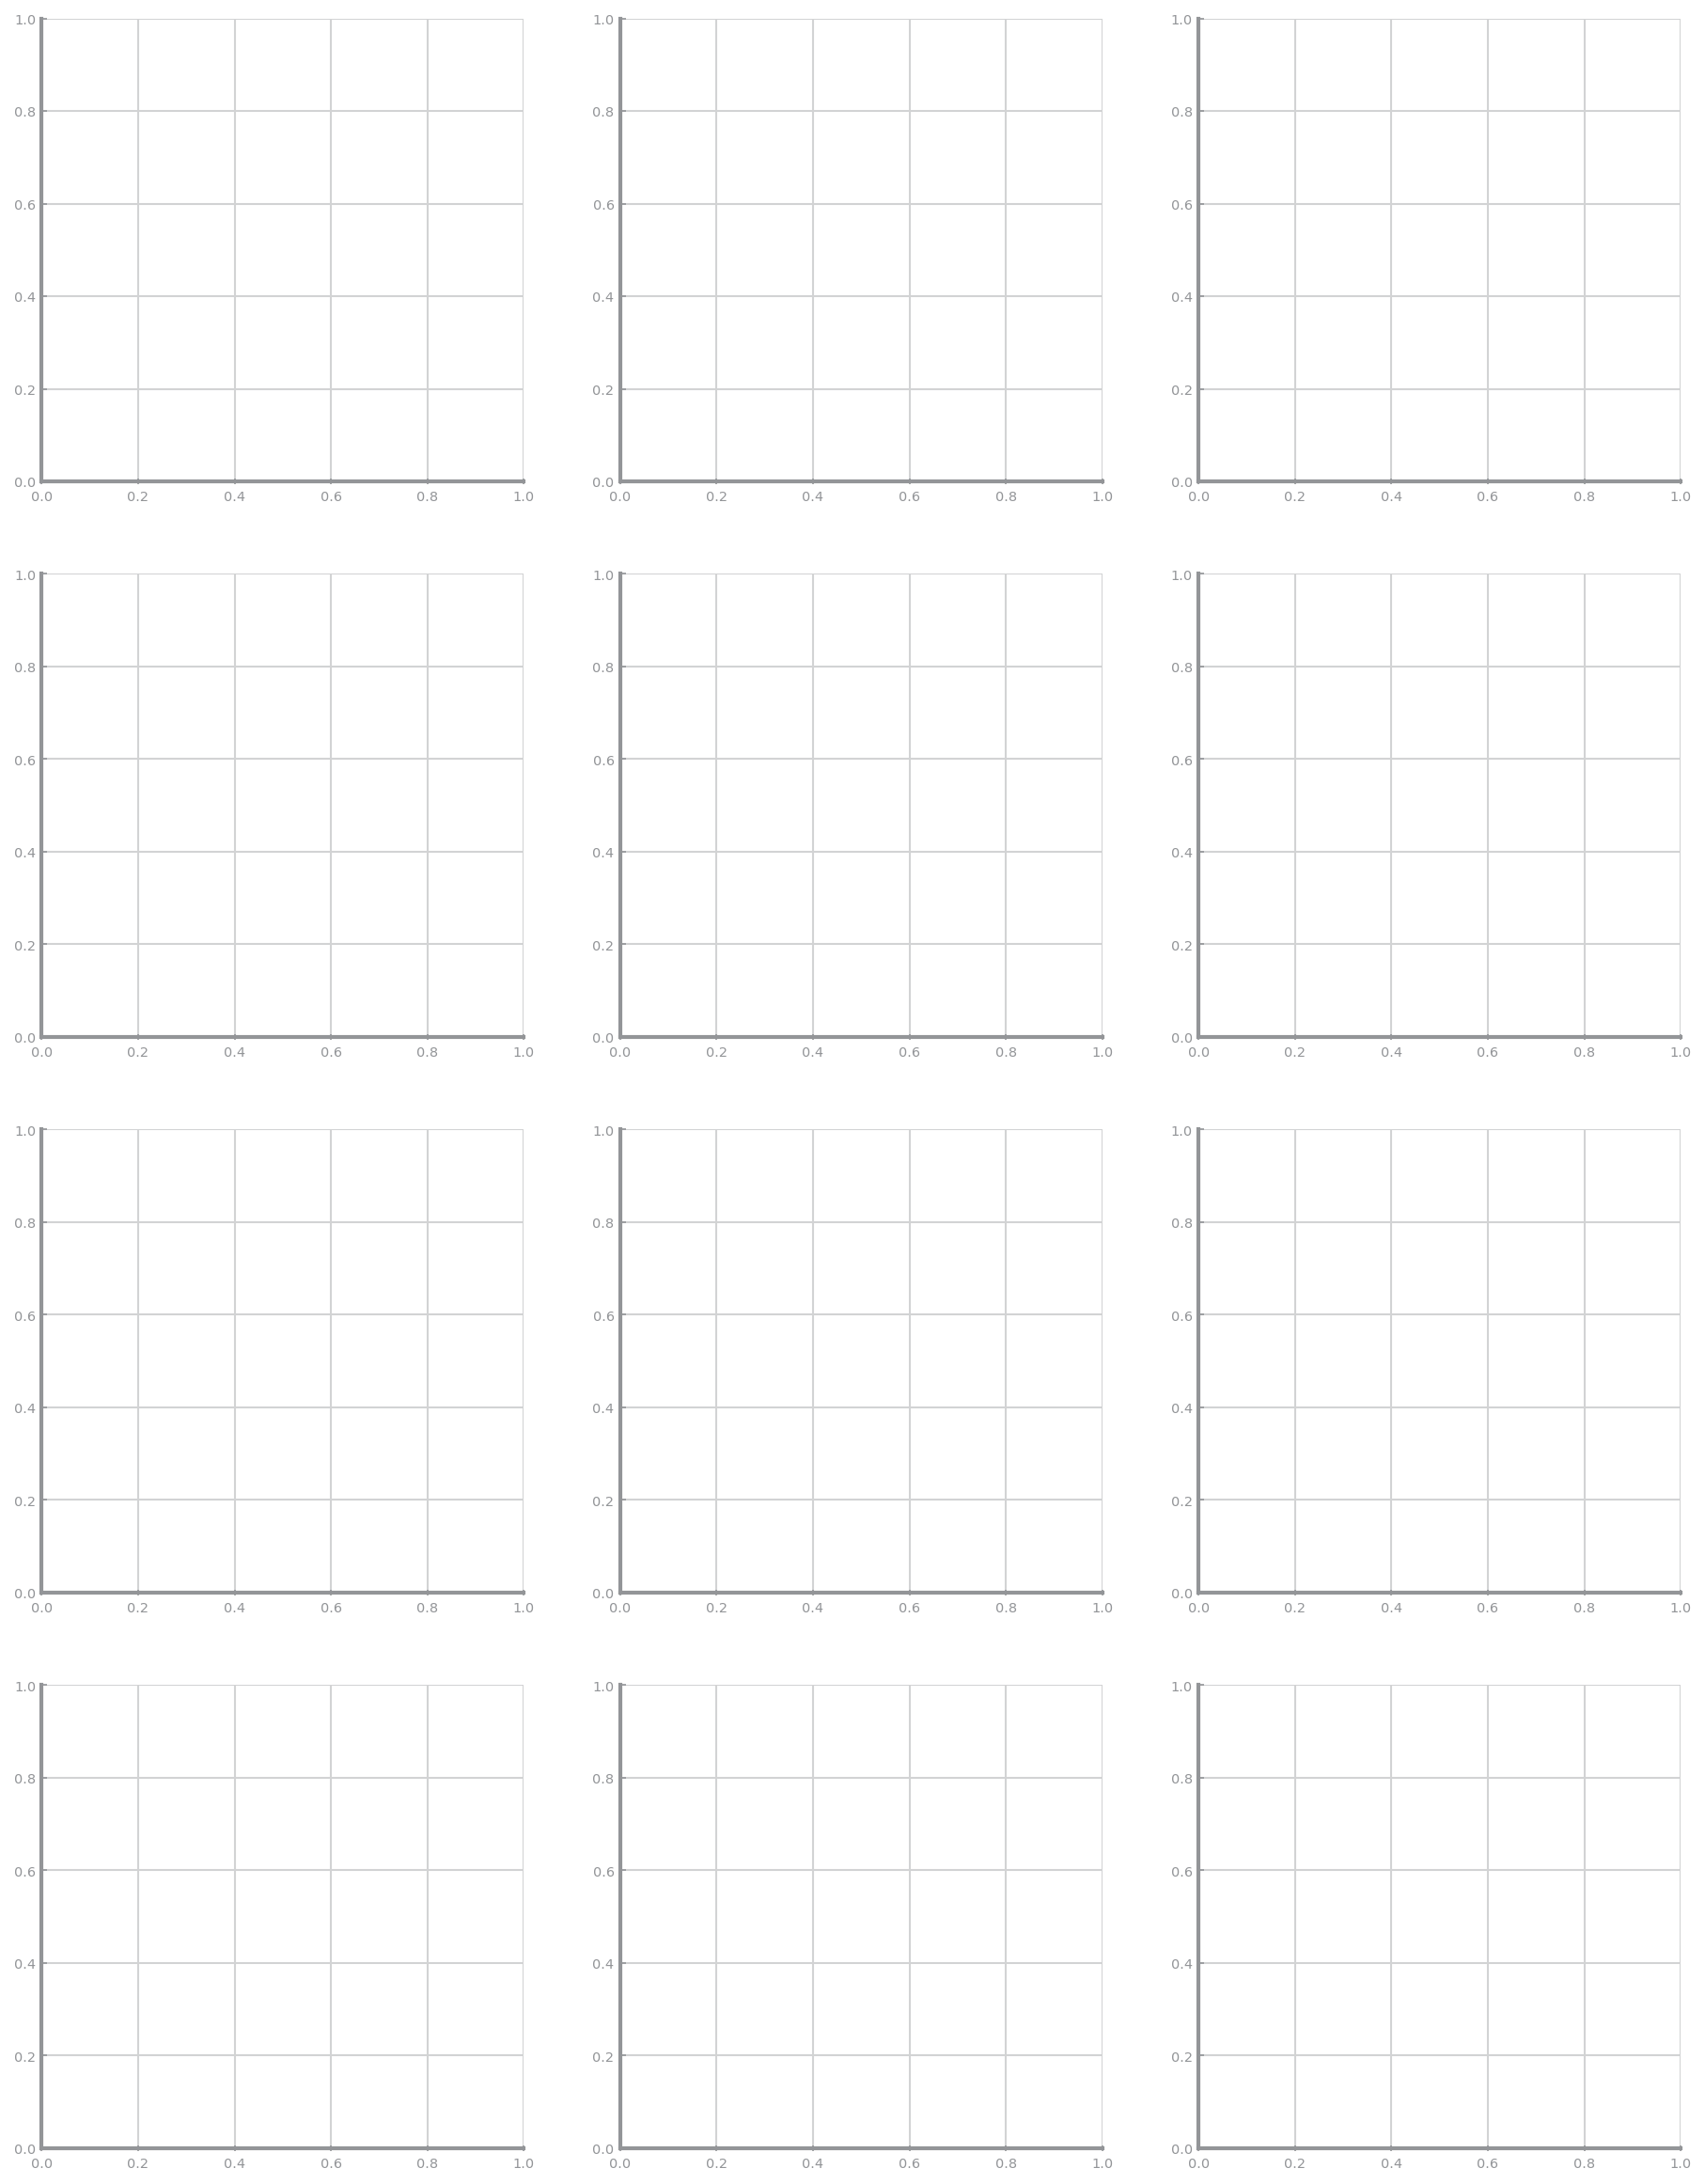

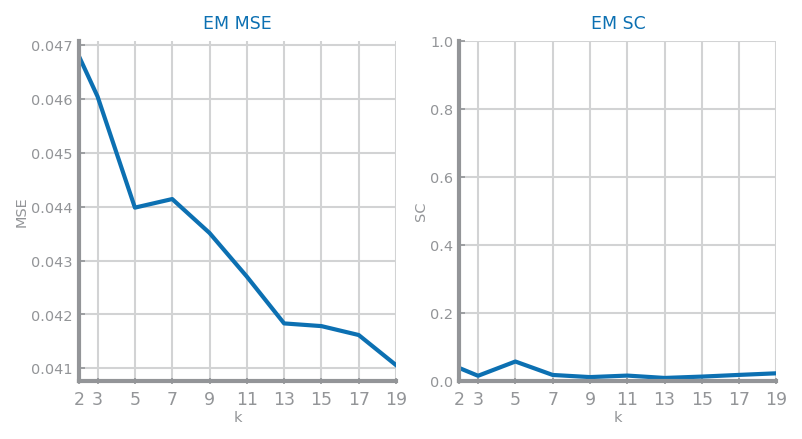

In [38]:

df = data2.copy()


N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19] #, 21, 23, 25, 27, 29]
rows, cols = ds.choose_grid(len(N_CLUSTERS))
X_f, y_f = fs.best_feature_selection_data2(df)
df = pd.DataFrame(X_f)

v1 = 2
v2 = 3

mse: list = []
sc: list = []
_, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    estimator = GaussianMixture(n_components=k)
    estimator.fit(df)
    labels = estimator.predict(df)
    mse.append(ds.compute_mse(df.values, labels, estimator.means_))
    sc.append(silhouette_score(df, labels))
    #ds.plot_clusters(df, v2, v1, labels.astype(float), estimator.means_, k,
                     #f'EM k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(6, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, mse, title='EM MSE', xlabel='k', ylabel='MSE', ax=ax[0, 0])
ds.plot_line(N_CLUSTERS, sc, title='EM SC', xlabel='k', ylabel='SC', ax=ax[0, 1], percentage=True)
plt.show()